In [1]:
suppressMessages(library(survminer))
suppressMessages(library(survival))
suppressMessages(library(forestplot))
suppressMessages(library(ggsci))
suppressMessages(library(mice))

Warning message:
“package ‘checkmate’ was built under R version 4.3.2”


### 1. Imputation with Continuous Variables
---

In [5]:
X <- read.table('data/processed/AL_for_ccp_02.tsv', sep='\t', header=T, row.names='Code.ID')

In [6]:
Ximp <- mice(data = X, m = 5, maxit = 100, seed = 500)


 iter imp variable
  1   1  Kappa_sFLC  Lambda_sFLC  kappa_lambda_ratio  dFLC  Bone_marrow_plasma_cells____  IVSd  LVEF  WBC  Hemoglobin  MCV  Platelet_count  Sed_rate  D_dimer  Factor_X  eGFR  X24_hr_UTP  Albumin  Alk_phos  BNP  Troponin  Calcium  Uric_acid  LDH  Iron  TIBC  Systolic_BP_sitting  Diastolic_BP_sitting  Pulse_sitting
  1   2  Kappa_sFLC  Lambda_sFLC  kappa_lambda_ratio  dFLC  Bone_marrow_plasma_cells____  IVSd  LVEF  WBC  Hemoglobin  MCV  Platelet_count  Sed_rate  D_dimer  Factor_X  eGFR  X24_hr_UTP  Albumin  Alk_phos  BNP  Troponin  Calcium  Uric_acid  LDH  Iron  TIBC  Systolic_BP_sitting  Diastolic_BP_sitting  Pulse_sitting
  1   3  Kappa_sFLC  Lambda_sFLC  kappa_lambda_ratio  dFLC  Bone_marrow_plasma_cells____  IVSd  LVEF  WBC  Hemoglobin  MCV  Platelet_count  Sed_rate  D_dimer  Factor_X  eGFR  X24_hr_UTP  Albumin  Alk_phos  BNP  Troponin  Calcium  Uric_acid  LDH  Iron  TIBC  Systolic_BP_sitting  Diastolic_BP_sitting  Pulse_sitting
  1   4  Kappa_sFLC  Lambda_sFLC  k

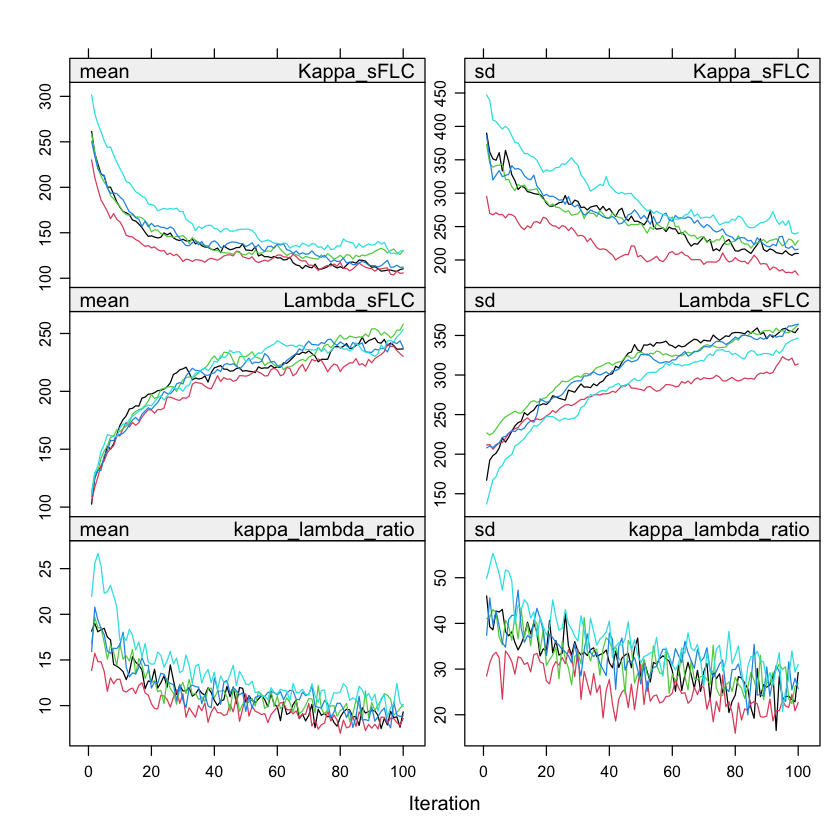

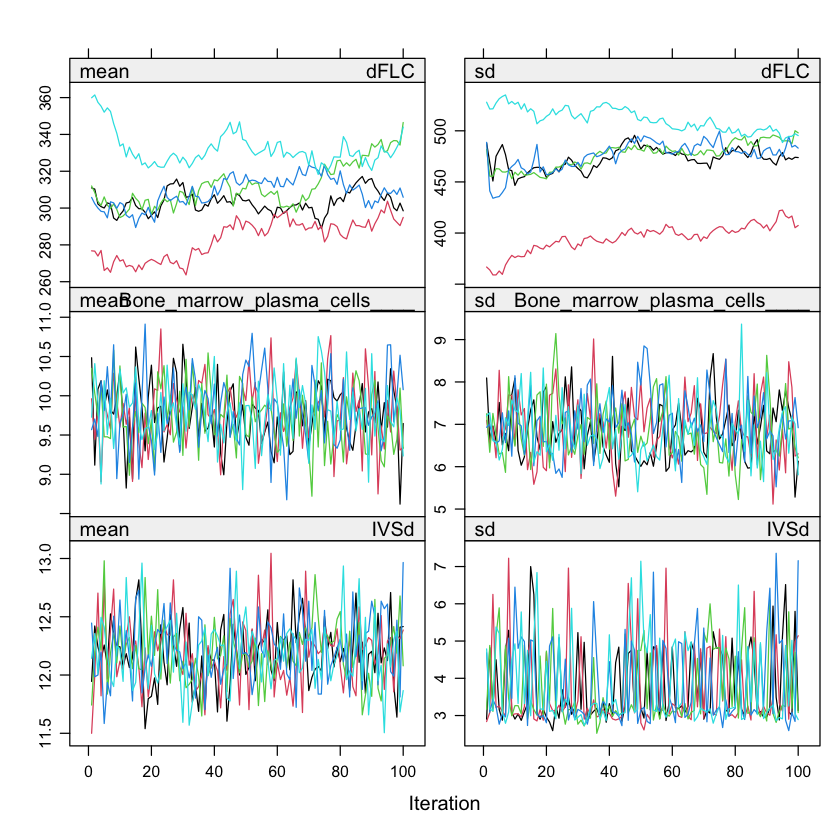

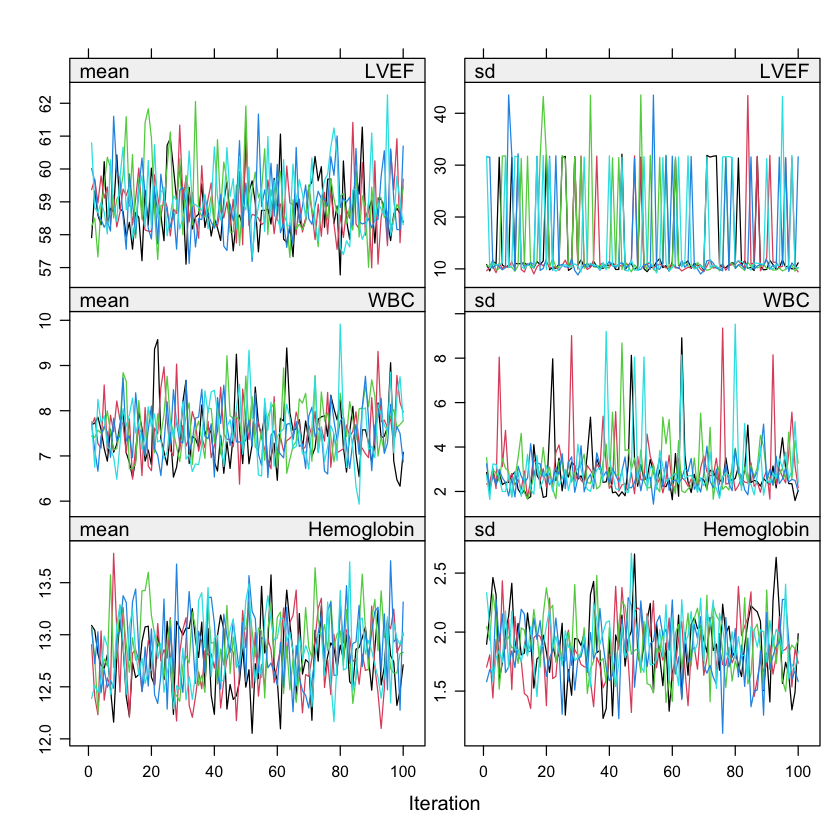

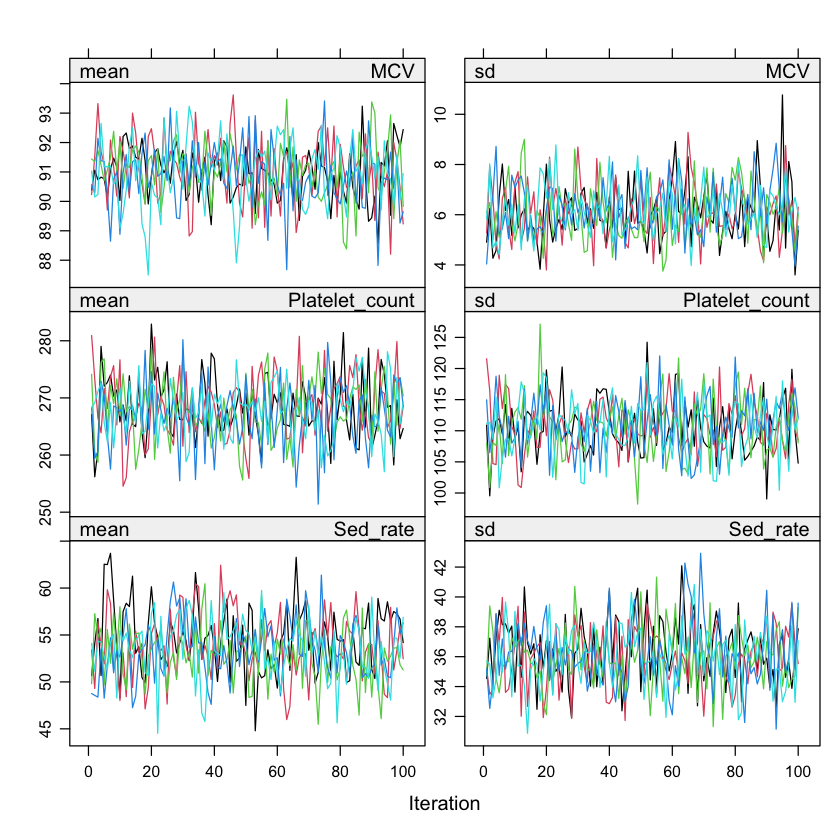

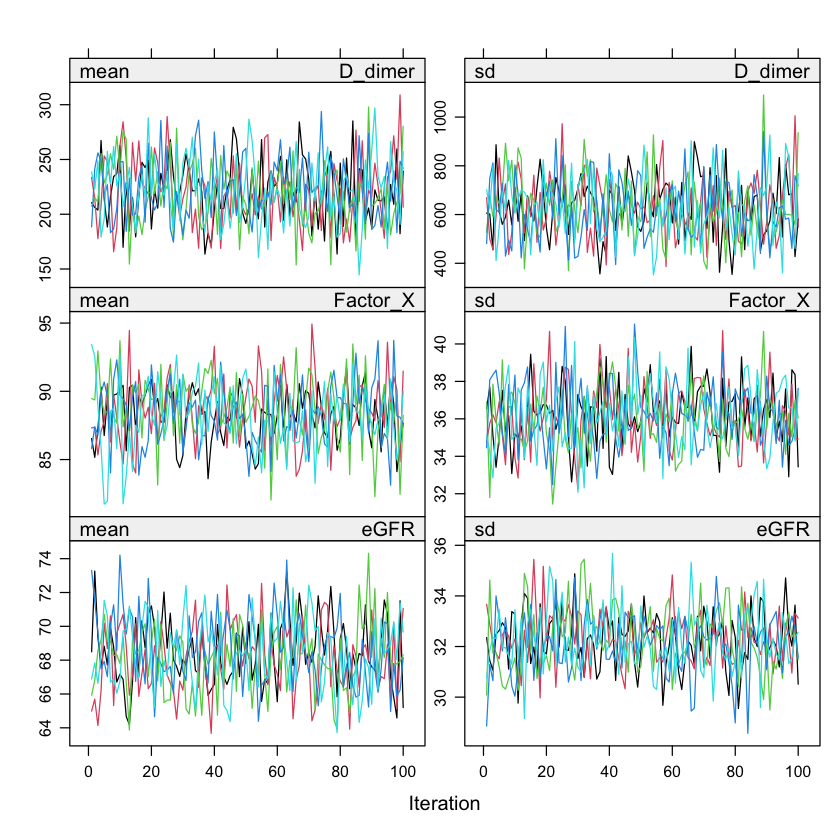

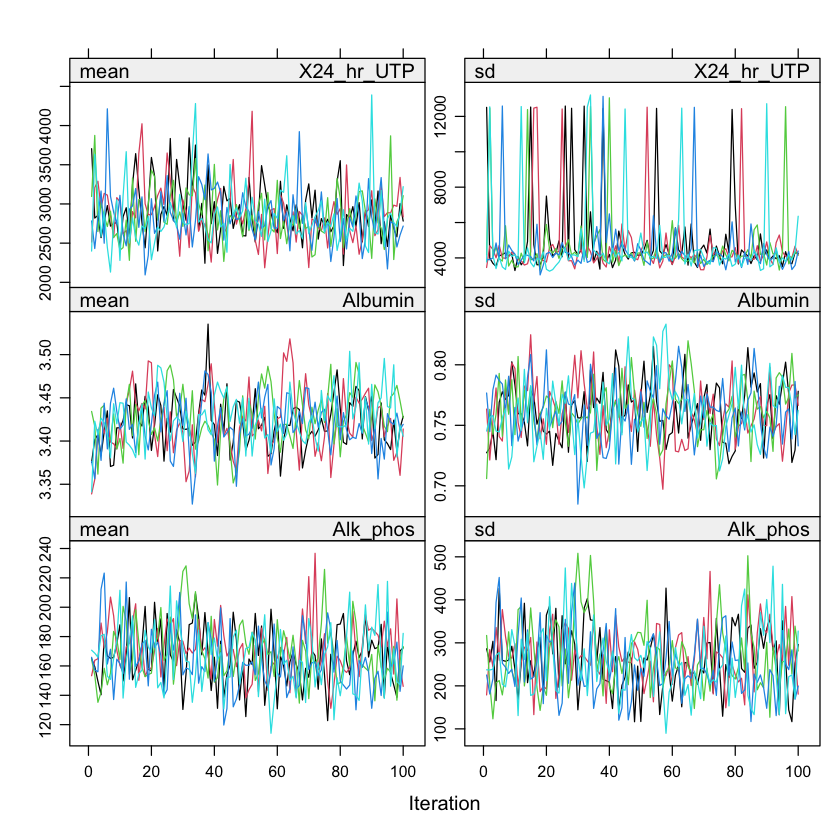

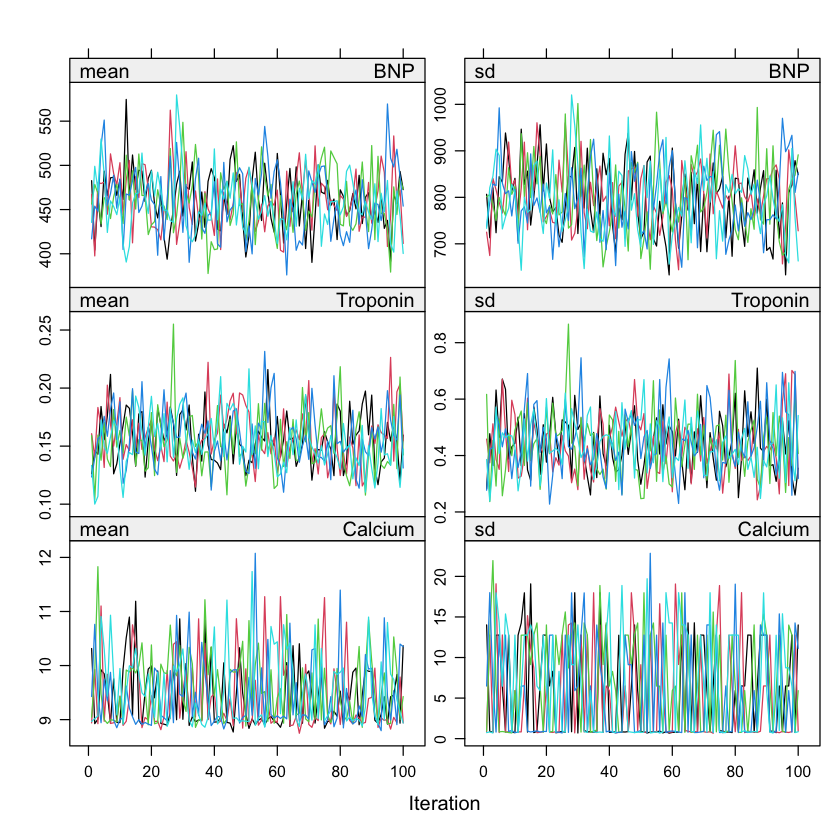

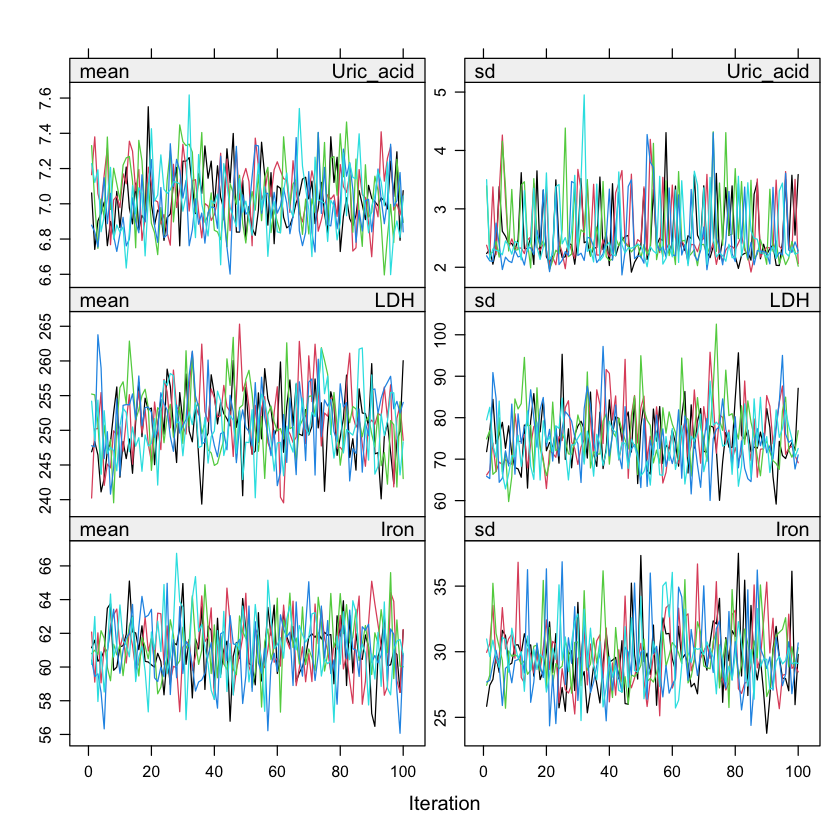

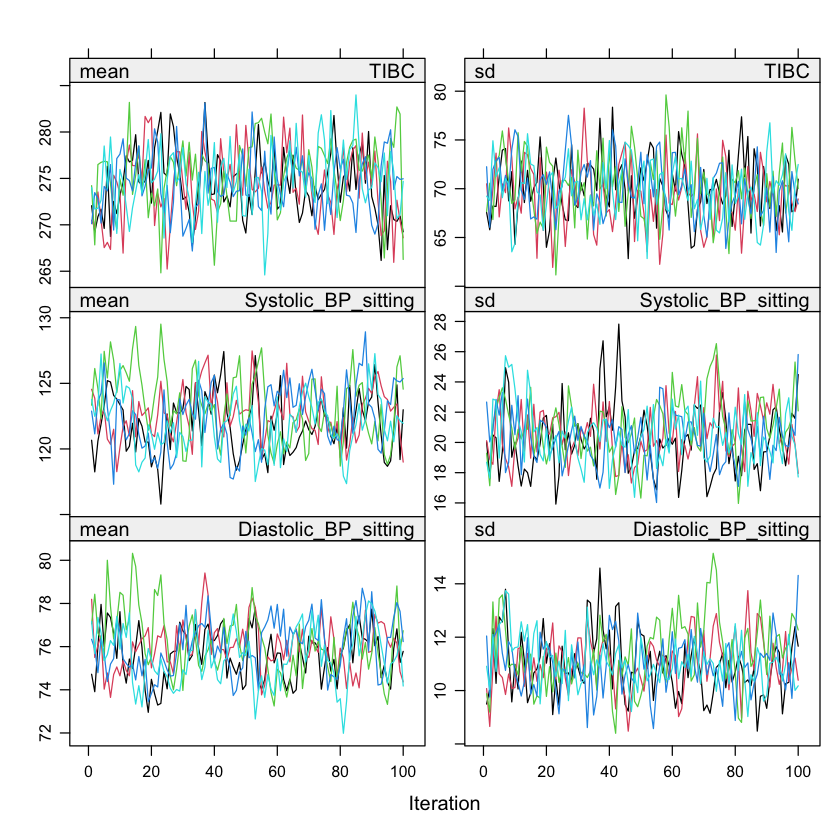

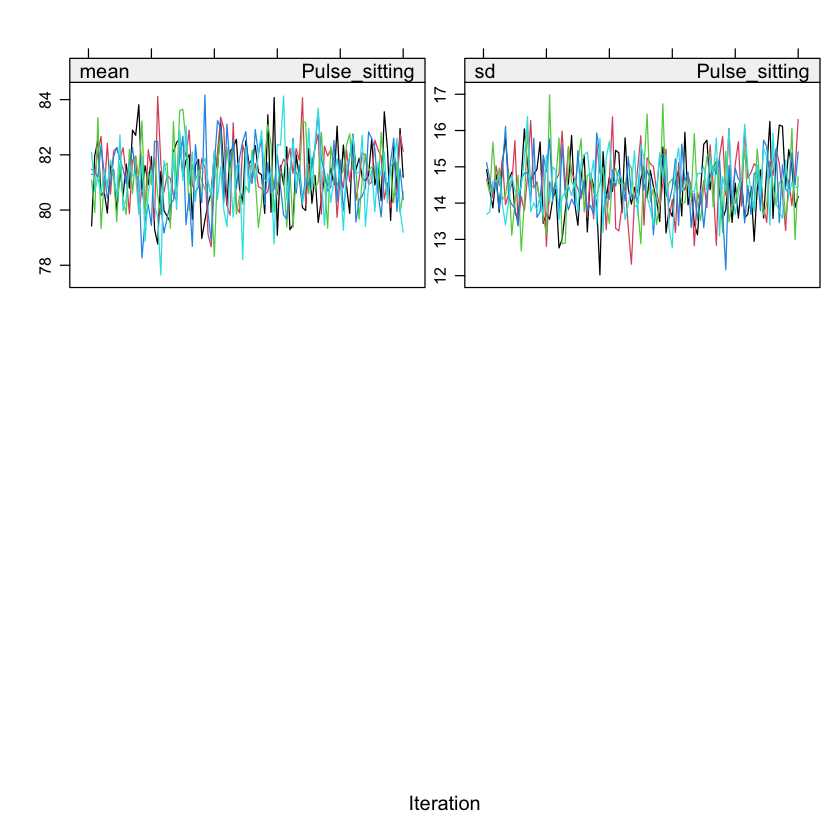

In [7]:
plot(Ximp)

In [8]:
# Save object
saveRDS(Ximp, file = "data/imputed/mice_qvars_01.rds")

for (i in 1:5){
    # Create new dataframe
    X.imputed <- complete(Ximp,i)
    rownames(X.imputed) <- rownames(X)
    
    write.table(X.imputed, paste("data/imputed/mice_qvars_0",i,".tsv", sep=""), sep='\t')
}

### 2. Imputation with Continuous + Categorical Variables
---

* In progress

In [2]:
data.df <- read.table("data/processed/AL_for_imputation_01.tsv", sep="\t", header=T)
rownames(data.df) <- data.df$Code.ID
data.df$Code.ID <- NULL

In [12]:
data.df[sapply(data.df, is.character)] <- lapply(data.df[sapply(data.df, is.character)], as.factor)


In [ ]:
# Imputation with multivariable imputation by chained equations (MICE)
imp <- mice(data = data.df, m = 5, maxit = 100, seed = 500)

In [5]:
#saveRDS(imp, file = "data/imputed/dataset_mice_01.rds") 

In [ ]:
#plot(imp)

In [7]:
X <- complete(imp,1)
rownames(X) <- rownames(data.df)